In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score
from scipy.special import boxcox1p
from scipy.stats import skew, kurtosis

In [32]:
df = pd.read_csv('D:/4-2/ML lab/Final Rainfall_Report.csv')
print(df.head(5))
print(df.describe())
print(df.shape)
print(df.info())

   SL.          Station    Year  Month  Total_Rainfall_(mm)  \
0  1.0  Syedpur (41858)  1950.0    1.0                  0.0   
1  2.0  Ambagan (41977)  1950.0    1.0                  0.0   
2  3.0  Barisal (11704)  1950.0    1.0                  0.0   
3  4.0    Bhola (11706)  1950.0    1.0                  0.0   
4  5.0    Bogra (10408)  1950.0    1.0                  0.0   

   Cloud Coverage (Octs)  Humidity  Maximum_Temperature  Minimum_Temperature  \
0                   0.39     77.26                25.42                10.05   
1                   1.21     68.93                26.79                10.87   
2                   1.26     62.45                31.81                15.53   
3                   1.07     49.60                33.62                18.86   
4                   3.39     71.48                33.72                23.84   

   Sunshine  Windspeed    Eto    PET Rainfall  Pressure WindDir  \
0      7.14       1.68  19.30  21.21       NO    1007.7       W   
1     

C:\Users\User\AppData\Local\Temp\ipykernel_9824\412055871.py:1: DtypeWarning: Columns (1,13,15,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/4-2/ML lab/Final Rainfall_Report.csv')


In [33]:
df = df.drop(["SL.","Station","Year"], axis=1)
print(df.head(5))
df = df.dropna(axis=0, how='any')
print(df.shape)
print(df.describe())

   Month  Total_Rainfall_(mm)  Cloud Coverage (Octs)  Humidity  \
0    1.0                  0.0                   0.39     77.26   
1    1.0                  0.0                   1.21     68.93   
2    1.0                  0.0                   1.26     62.45   
3    1.0                  0.0                   1.07     49.60   
4    1.0                  0.0                   3.39     71.48   

   Maximum_Temperature  Minimum_Temperature  Sunshine  Windspeed    Eto  \
0                25.42                10.05      7.14       1.68  19.30   
1                26.79                10.87      7.99       1.64  17.99   
2                31.81                15.53      8.66       1.95  21.85   
3                33.62                18.86      6.55       2.08  30.31   
4                33.72                23.84      7.12       2.13  31.90   

     PET Rainfall  Pressure WindDir  WindGustSpeed WindGustDir  \
0  21.21       NO    1007.7       W           20.0           W   
1  19.76       NO   

In [34]:
le=LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir'] = le.fit_transform(df['WindDir'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['Rainfall'] = le.fit_transform(df['Rainfall'])
df['Rainfall_In_Future'] = le.fit_transform(df['Rainfall_In_Future'])

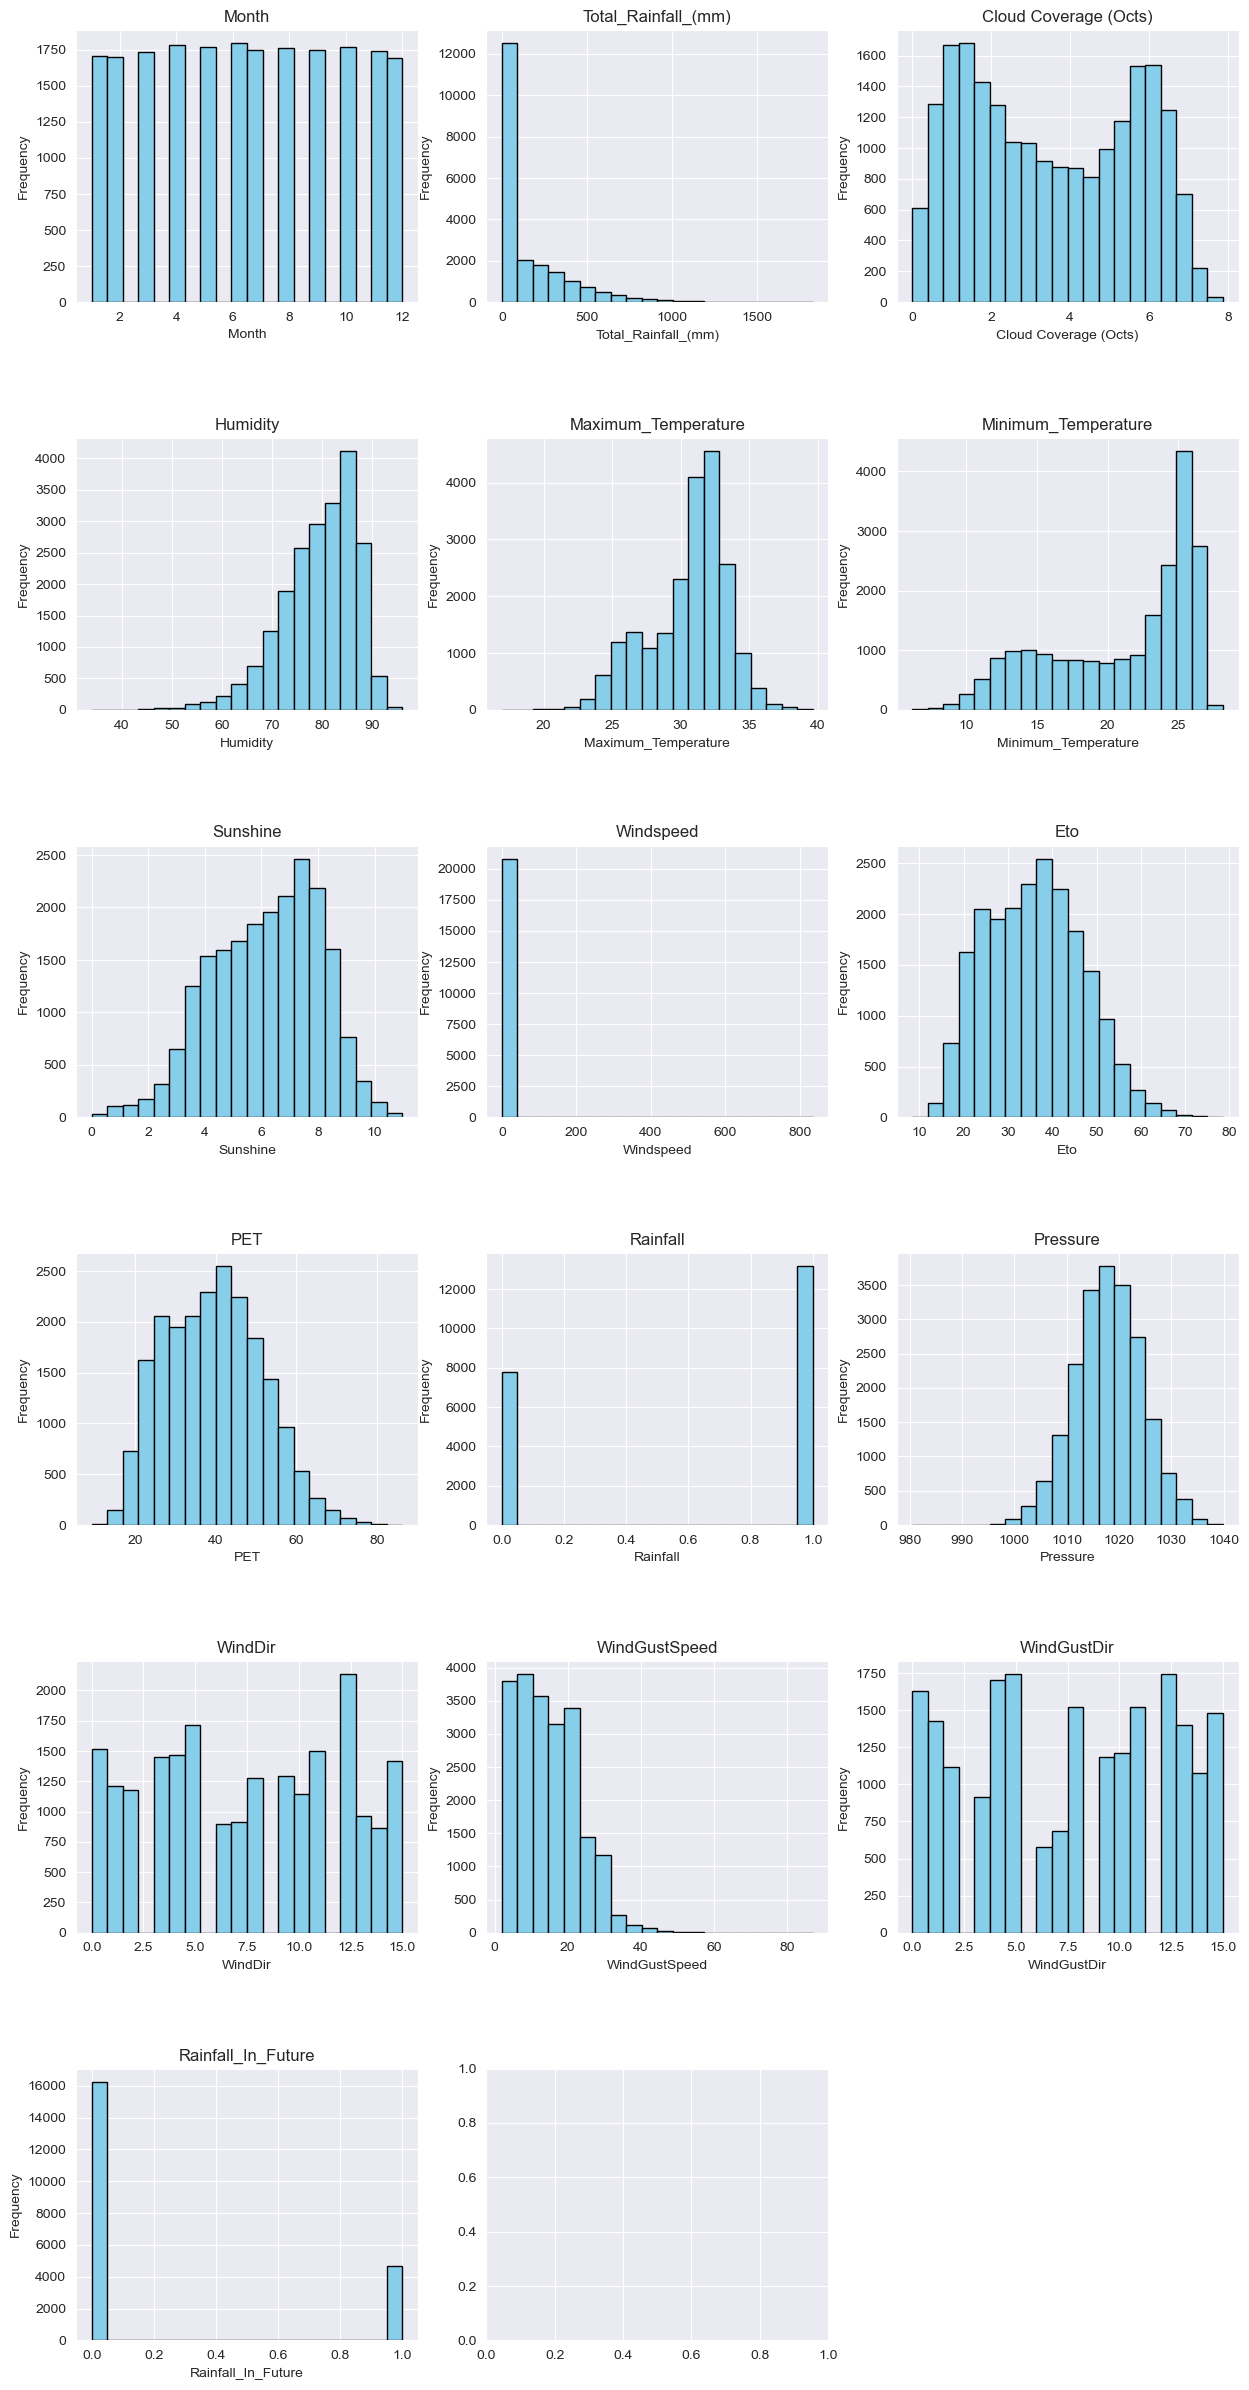

In [49]:

# Assuming 'df' is your DataFrame containing the dataset
# Load your dataset
# List of attributes for which you want to plot histograms
attributes = ['Month', 'Total_Rainfall_(mm)', 'Cloud Coverage (Octs)', 'Humidity',
              'Maximum_Temperature', 'Minimum_Temperature', 'Sunshine', 'Windspeed',
              'Eto', 'PET', 'Rainfall', 'Pressure', 'WindDir', 'WindGustSpeed',
              'WindGustDir', 'Rainfall_In_Future']

# Set up subplots for histograms
fig, axs = plt.subplots(nrows=len(attributes) // 3 + 1, ncols=3, figsize=(15, 5 * (len(attributes) // 3 + 1)))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each attribute
for i, attr in enumerate(attributes):
    row = i // 3
    col = i % 3
    axs[row, col].hist(df[attr].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot histogram
    axs[row, col].set_title(attr)  # Set subplot title
    axs[row, col].set_xlabel(attr)  # Set xlabel
    axs[row, col].set_ylabel('Frequency')  # Set ylabel

# Remove empty subplot(s) if number of attributes is not a multiple of 3
if len(attributes) % 3 != 0:
    axs[-1, -1].axis('off')

# Show plot
plt.show()


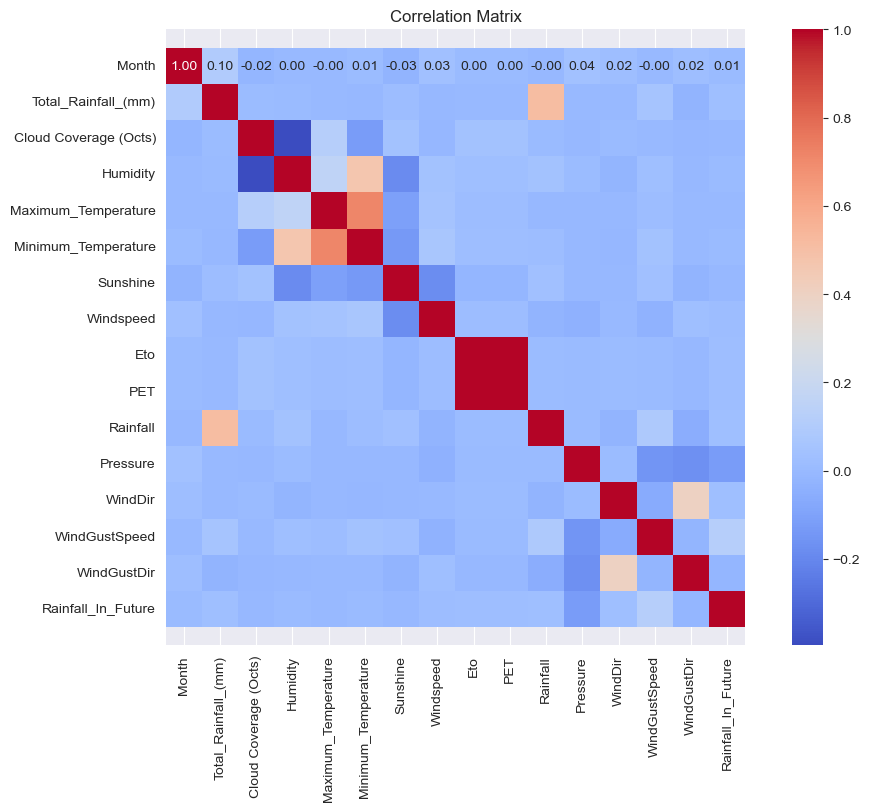

In [56]:

import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# Generate a correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Set the title
plt.title('Correlation Matrix')

# Fix for matplotlib 3.1.1 issue
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Show the plot
plt.show()


In [35]:
X = df.drop(columns = ['Rainfall_In_Future', 'Total_Rainfall_(mm)'], axis=1)
y1 = df['Rainfall_In_Future']  # Target for classification (yes/no)
y2 = df['Total_Rainfall_(mm)']  # Target for regression (mm)

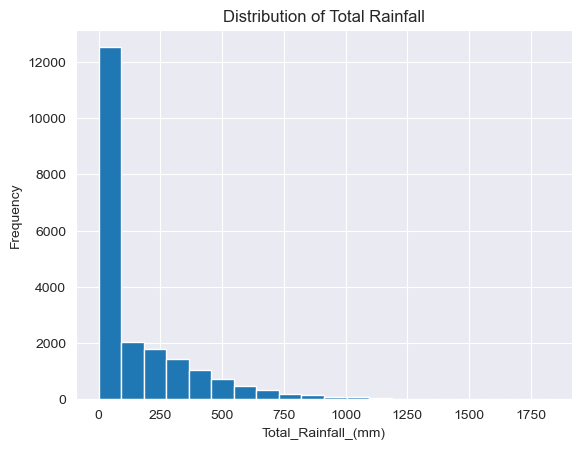

In [36]:
plt.hist(y2, bins=20)
plt.xlabel('Total_Rainfall_(mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rainfall')
plt.show()

In [37]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

Random Forest Classifier

Classification Report for 'Rainfall_In_Future':
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3292
           1       0.51      0.05      0.09       898

    accuracy                           0.79      4190
   macro avg       0.65      0.52      0.49      4190
weighted avg       0.73      0.79      0.71      4190

Accuracy Score for 'Rainfall_In_Future':
0.7861575178997613

Mean Squared Error for 'Total_Rainfall_(mm)': 4219.111947826086
R-squared for 'Total_Rainfall_(mm)': 0.9272326840048128


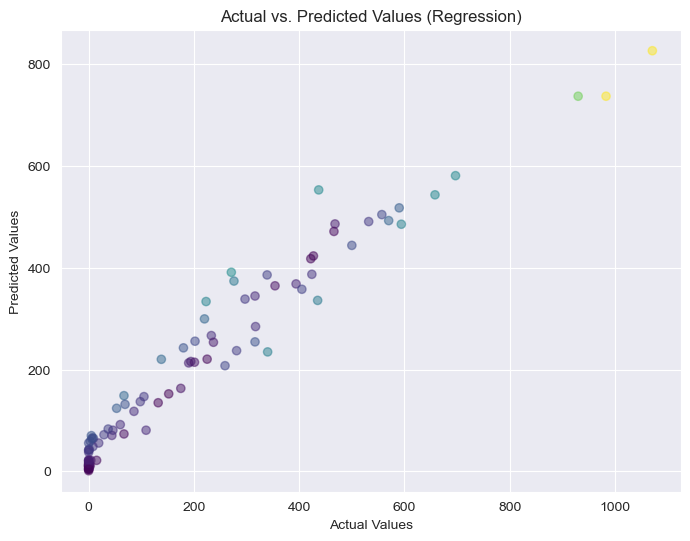

In [38]:
# Step 3: Model Training - RandomForestClassifier for 'Rainfall_In_Future'
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y1_train)

# Step 4: Predict 'Rainfall_In_Future' on the test set
predictions_rainfall_future_1 = rf.predict(X_test)

# Step 8: Evaluation
# Classification Report for 'Rainfall_In_Future'
print("Classification Report for 'Rainfall_In_Future':")
print(classification_report(y1_test, predictions_rainfall_future_1))
print("Accuracy Score for 'Rainfall_In_Future':")
print(accuracy_score(y1_test, predictions_rainfall_future_1))
# Step 5: Filtering Data for Regression (where 'Rainfall_In_Future' = 'yes')
X_regression = X_test[predictions_rainfall_future_1 == 1]
y2_regression = y2_test[predictions_rainfall_future_1 == 1]

regressor_1 = RandomForestRegressor(n_estimators=100, random_state=42)
# Check if there are samples for regression
if len(X_regression) > 0:
    # Step 6: Model Training - RandomForestRegressor for 'Total_Rainfall_(mm)'
    regressor_1.fit(X_regression, y2_regression)

    # Step 7: Predict 'Total_Rainfall_(mm)' for instances predicted as 'yes'
    predictions_total_rainfall_1 = regressor_1.predict(X_regression)

    # Step 8: Evaluation
    # Regression Evaluation (e.g., Mean Squared Error) for 'Total_Rainfall_(mm)'
    mse = mean_squared_error(y2_regression, predictions_total_rainfall_1)
    print("\nMean Squared Error for 'Total_Rainfall_(mm)':", mse)
    r2 = r2_score(y2_regression, predictions_total_rainfall_1)
    print("R-squared for 'Total_Rainfall_(mm)':", r2)
    # Create scatter plot of actual vs. predicted values
    abs_errors = np.abs(predictions_total_rainfall_1 - y2_regression)
    plt.figure(figsize=(8, 6))
    plt.scatter(y2_regression, predictions_total_rainfall_1, c=abs_errors, cmap='viridis', alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values (Regression)')
    plt.show()

else:
    print("No samples available for regression.")


Decision Tree Classifier

Classification Report for 'Rainfall_In_Future':
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3292
           1       0.28      0.32      0.30       898

    accuracy                           0.68      4190
   macro avg       0.54      0.55      0.54      4190
weighted avg       0.69      0.68      0.68      4190

Accuracy Score for 'Rainfall_In_Future':
0.6756563245823389

Mean Squared Error for 'Total_Rainfall_(mm)': 3108.027237104506
R-squared for 'Total_Rainfall_(mm)': 0.9383391286086803


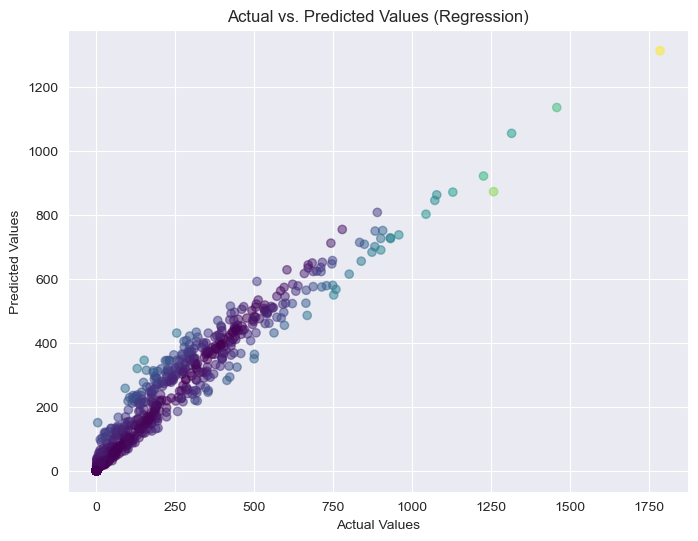

In [39]:
# Step 3: Model Training - RandomForestClassifier for 'Rainfall_In_Future'
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y1_train)

# Step 4: Predict 'Rainfall_In_Future' on the test set
predictions_rainfall_future_2 = dt.predict(X_test)

# Step 8: Evaluation
# Classification Report for 'Rainfall_In_Future'
print("Classification Report for 'Rainfall_In_Future':")
print(classification_report(y1_test, predictions_rainfall_future_2))
print("Accuracy Score for 'Rainfall_In_Future':")
print(accuracy_score(y1_test, predictions_rainfall_future_2))
# Step 5: Filtering Data for Regression (where 'Rainfall_In_Future' = 'yes')
X_regression = X_test[predictions_rainfall_future_2 == 1]
y2_regression = y2_test[predictions_rainfall_future_2 == 1]

regressor_2 = RandomForestRegressor(n_estimators=100, random_state=42)
# Check if there are samples for regression
if len(X_regression) > 0:
    # Step 6: Model Training - RandomForestRegressor for 'Total_Rainfall_(mm)'
    regressor_2.fit(X_regression, y2_regression)

    # Step 7: Predict 'Total_Rainfall_(mm)' for instances predicted as 'yes'
    predictions_total_rainfall_2 = regressor_2.predict(X_regression)

    # Step 8: Evaluation
    # Regression Evaluation (e.g., Mean Squared Error) for 'Total_Rainfall_(mm)'
    mse = mean_squared_error(y2_regression, predictions_total_rainfall_2)
    print("\nMean Squared Error for 'Total_Rainfall_(mm)':", mse)
    r2 = r2_score(y2_regression, predictions_total_rainfall_2)
    print("R-squared for 'Total_Rainfall_(mm)':", r2)
    # Create scatter plot of actual vs. predicted values
    abs_errors = np.abs(predictions_total_rainfall_2 - y2_regression)
    plt.figure(figsize=(8, 6))
    plt.scatter(y2_regression, predictions_total_rainfall_2, c=abs_errors, cmap='viridis', alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values (Regression)')
    plt.show()

else:
    print("No samples available for regression.")


Logistic Regression

Classification Report for 'Rainfall_In_Future':
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3292
           1       0.50      0.00      0.01       898

    accuracy                           0.79      4190
   macro avg       0.64      0.50      0.44      4190
weighted avg       0.72      0.79      0.69      4190

Accuracy Score for 'Rainfall_In_Future':
0.7856801909307876

Mean Squared Error for 'Total_Rainfall_(mm)': 9.926167350636332e-24
R-squared for 'Total_Rainfall_(mm)': 1.0


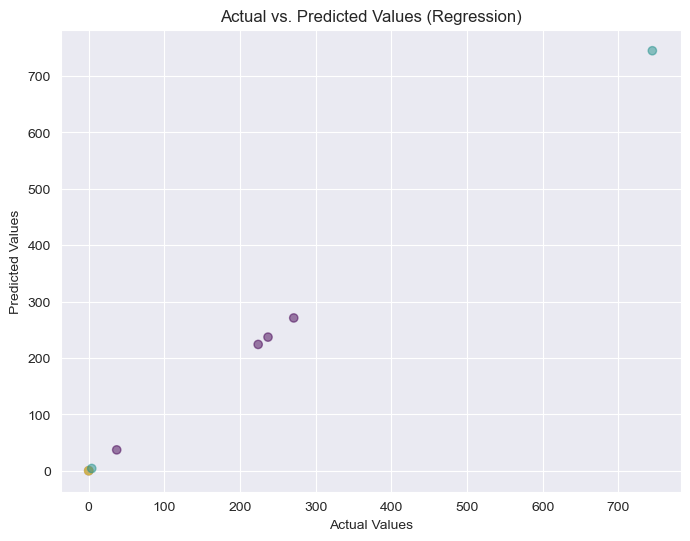

In [45]:
# Step 3: Model Training - RandomForestClassifier for 'Rainfall_In_Future'
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LogisticRegression(solver='lbfgs', max_iter=21000)
lr.fit(X_train, y1_train)

# Step 4: Predict 'Rainfall_In_Future' on the test set
predictions_rainfall_future_3 = lr.predict(X_test)

# Step 8: Evaluation
# Classification Report for 'Rainfall_In_Future'
print("Classification Report for 'Rainfall_In_Future':")
print(classification_report(y1_test, predictions_rainfall_future_3))
print("Accuracy Score for 'Rainfall_In_Future':")
print(accuracy_score(y1_test, predictions_rainfall_future_3))
# Step 5: Filtering Data for Regression (where 'Rainfall_In_Future' = 'yes')
X_regression = X_test[predictions_rainfall_future_3 == 1]
y2_regression = y2_test[predictions_rainfall_future_3 == 1]

regressor_3 = LinearRegression()
# Check if there are samples for regression
if len(X_regression) > 0:
    # Step 6: Model Training - RandomForestRegressor for 'Total_Rainfall_(mm)'
    regressor_3.fit(X_regression, y2_regression)

    # Step 7: Predict 'Total_Rainfall_(mm)' for instances predicted as 'yes'
    predictions_total_rainfall_3 = regressor_3.predict(X_regression)

    # Step 8: Evaluation
    # Regression Evaluation (e.g., Mean Squared Error) for 'Total_Rainfall_(mm)'
    mse = mean_squared_error(y2_regression, predictions_total_rainfall_3)
    print("\nMean Squared Error for 'Total_Rainfall_(mm)':", mse)
    r2 = r2_score(y2_regression, predictions_total_rainfall_3)
    print("R-squared for 'Total_Rainfall_(mm)':", r2)
    # Create scatter plot of actual vs. predicted values
    abs_errors = np.abs(predictions_total_rainfall_3 - y2_regression)
    plt.figure(figsize=(8, 6))
    plt.scatter(y2_regression, predictions_total_rainfall_3, c=abs_errors, cmap='viridis', alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values (Regression)')
    plt.show()

else:
    print("No samples available for regression.")


K-nearest Neighbours

Classification Report for 'Rainfall_In_Future':
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3292
           1       0.28      0.12      0.17       898

    accuracy                           0.74      4190
   macro avg       0.53      0.52      0.51      4190
weighted avg       0.68      0.74      0.70      4190

Accuracy Score for 'Rainfall_In_Future':
0.7448687350835322

Mean Squared Error for 'Total_Rainfall_(mm)': 35749.05399477806
R-squared for 'Total_Rainfall_(mm)': 0.21950243592335783


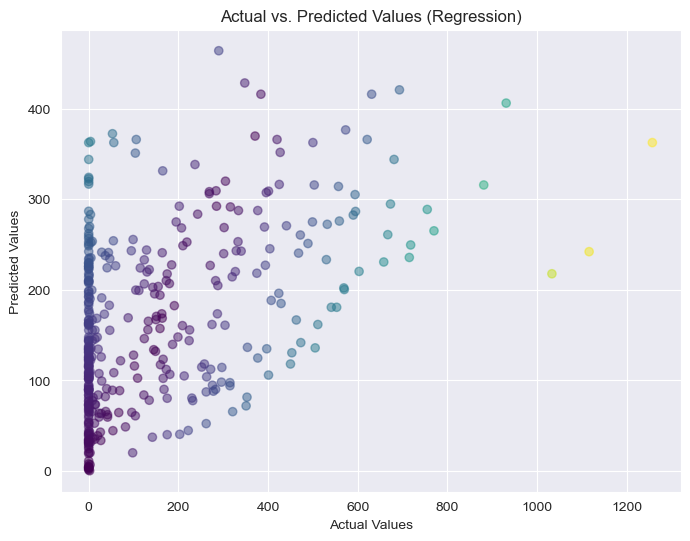

In [48]:
# Step 3: Model Training - RandomForestClassifier for 'Rainfall_In_Future'
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier()
knn.fit(X_train, y1_train)

# Step 4: Predict 'Rainfall_In_Future' on the test set
predictions_rainfall_future_4 = knn.predict(X_test)

# Step 8: Evaluation
# Classification Report for 'Rainfall_In_Future'
print("Classification Report for 'Rainfall_In_Future':")
print(classification_report(y1_test, predictions_rainfall_future_4))
print("Accuracy Score for 'Rainfall_In_Future':")
print(accuracy_score(y1_test, predictions_rainfall_future_4))
# Step 5: Filtering Data for Regression (where 'Rainfall_In_Future' = 'yes')
X_regression = X_test[predictions_rainfall_future_4 == 1]
y2_regression = y2_test[predictions_rainfall_future_4 == 1]

regressor_4 = KNeighborsRegressor(n_neighbors=5)
# Check if there are samples for regression
if len(X_regression) > 0:
    # Step 6: Model Training - RandomForestRegressor for 'Total_Rainfall_(mm)'
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_regression)
    X_test_scaled = scaler.transform(X_test)
    regressor_4.fit(X_regression, y2_regression)

    # Step 7: Predict 'Total_Rainfall_(mm)' for instances predicted as 'yes'
    predictions_total_rainfall_4 = regressor_4.predict(X_regression)

    # Step 8: Evaluation
    # Regression Evaluation (e.g., Mean Squared Error) for 'Total_Rainfall_(mm)'
    mse = mean_squared_error(y2_regression, predictions_total_rainfall_4)
    print("\nMean Squared Error for 'Total_Rainfall_(mm)':", mse)
    r2 = r2_score(y2_regression, predictions_total_rainfall_4)
    print("R-squared for 'Total_Rainfall_(mm)':", r2)
    # Create scatter plot of actual vs. predicted values
    abs_errors = np.abs(predictions_total_rainfall_4 - y2_regression)
    plt.figure(figsize=(8, 6))
    plt.scatter(y2_regression, predictions_total_rainfall_4, c=abs_errors, cmap='viridis', alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values (Regression)')
    plt.show()

else:
    print("No samples available for regression.")
